# Scale Free Network simulations

In [141]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import EoN
import networkx as nx
import pandas as pd
import scipy.interpolate


N = 10**4
G = nx.barabasi_albert_graph(N, 4)
tmax = 200
simulationRuns = 50
tau = 0.025     #transmission rate
gamma = 0.1     #recovery rate
rho = 0.005     #random fraction initially infected
step = 0.1      #step size

In [160]:
def resample(x, n):
    f = scipy.interpolate.interp1d(np.linspace(0, 1, x.size), x, kind = 'linear')
    return f(np.linspace(0, 1, n))

No handles with labels found to put in legend.


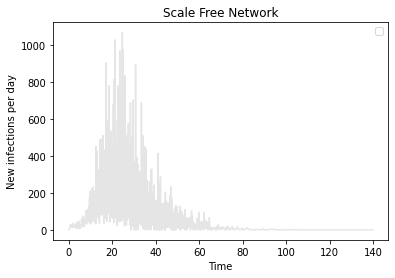

<Figure size 432x288 with 0 Axes>

In [173]:
x = np.arange(0, tmax, step)
y = np.arange(0, tmax, step)

# previous version (without sampling)
#t, S, I, R = EoN.fast_SIR(G, tau, gamma, rho = rho, tmax = tmax)
#plt.plot(t, S, color = 'red', label = 'S')
#plt.plot(t, I, color = 'blue', label = 'I')
#plt.plot(t, R, color = 'green', label = 'R')

# version with sampling
# for counter in range(simulationRuns):
t, S, I, R = EoN.fast_SIR(G, tau, gamma, rho = rho, tmax = tmax)
t = resample(t, int(tmax/step))
S = resample(S, int(tmax/step))
I = resample(I, int(tmax/step))
R = resample(R, int(tmax/step))
incidence = - np.diff(S)
for x in range(1, S.size-1):
    incidence[x] = -(S[x+1]-S[x])/(t[x+1]-t[x])
incidence = np.concatenate(([0], incidence))
#if counter == 0:
#    plt.plot(t, incidence, color = 'gray', alpha = 0.2, label = 'Individual simulation runs')
plt.plot(t, incidence, color = 'gray', alpha = 0.2)
#plt.plot(t, S, color = 'red', label = 'S')
#plt.plot(t, I, color = 'blue', label = 'I')
#plt.plot(t, R, color = 'green', label = 'R')

#df1 = pd.read_csv('Sources/Aparicio_ScaleFreS.csv')
#df1 = df1.loc[:, '{#status->#S}']
#inc1 = - df1.diff()*N
#inc1 = inc1[:2000]

#df2 = pd.read_csv('Sources/Stroud_HMS.csv')
#df2 = df2.loc[:, '{#status->#S}']
#inc2 = - df2.diff()*N
#inc2 = inc2[:2000]

#df3 = pd.read_csv('Sources/Stroud_ScaleS.csv')
#df3 = df3.loc[:, '{#status->#S}']
#inc3 = - df3.diff()*N
#inc3 = inc3[:2000]

#plt.plot(x, inc1, '--', label = 'Aparicio simulation', color = 'green')
#plt.plot(x, inc2, label = 'Homogeneous mixing simulation', color = 'red')
#plt.plot(x, inc3, '-.', label = 'Stroud simulation', color = 'blue')

plt.xlabel('Time')
plt.ylabel('New infections per day')
plt.title('Scale Free Network')
plt.legend()
plt.show()
plt.savefig('Plot/Scale_Free_network.png')

In [164]:
incidence

array([0.        , 6.        , 3.31615808, ..., 1.        , 2.        ,
       1.        ])

In [46]:
print(S)

[9950 9950 9949 ... 3965 3965 3965]


In [55]:
incidence

array([50,  1,  1, ...,  0,  0,  0])

In [60]:
I.max()

1441

In [113]:
a = np.array([1,2,3,4,5,6,7,8,9,10])

In [115]:
resample(a, 5, kind='linear')

array([ 1.  ,  3.25,  5.5 ,  7.75, 10.  ])

In [116]:
S

array([9950.        , 9944.04302151, 9940.08604302, ..., 4022.91395698,
       4022.        , 4021.        ])

In [138]:
t

array([0.00000000e+00, 7.83692922e-02, 2.18374167e-01, ...,
       1.66644077e+02, 1.67333985e+02, 1.68078244e+02])

In [145]:
np.linspace(0, 1, 100)

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747